# Detecting Online Payment Frauds with Machine Learning<br>
### Online Payment Fraud Detection using Python<br>
Importing necessary libraries and the dataset.

In [14]:

import pandas as pd
import numpy as np
import plotly.express as px

data = pd.read_csv('payment_data.csv')
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [15]:
# check for missing values
print(data.isnull().sum())

# explore transaction types
print(data.type.value_counts())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64
type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


Since there is no null values in this dataset, I will be taking a look at the type of transaction present in the dataset.

In [17]:
# get the count of each transaction type
type = data['type'].value_counts()
transactions = type.index
quantity = type.values

# create a new DataFrame for the pie chart
pie_data = pd.DataFrame({
    'transactions': transactions,
    'quantity': quantity
})

# create the pie chart
figure = px.pie(pie_data,
                values = 'quantity',
                names = 'transactions',
                hole = 0.5,
                title = "Distribution of Transaction Types")
figure.show()

Checking the correlation between the numeric features in the dataset with the **isFraud** column.

In [18]:
# checking correlation
numeric_data = data.select_dtypes(include = [np.number])

if 'isFraud' in numeric_data.columns:
    correlation = numeric_data.corr()
    print(correlation["isFraud"].sort_values(ascending=False))
else:
    print("Column 'isFraud' is not numeric or does not exist in the dataset.")


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


Transforming the categorical features **('type')** into numerical. Also transform the values of the **"isFraud"** column into **"No Fraud"** and **"Fraud"** labels for better understanding of the output.

In [19]:
data['type'] = data['type'].map({'CASH_OUT': 1, 'PAYMENT': 2,
                                'CASH_IN': 3, 'TRANSFER': 4,
                                'DEBIT': 5})
data['isFraud'] = data['isFraud'].map({0: 'No Fraud', 1: 'Fraud'})
print(data.head())


   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


### Online Payments Fraud Detection Model<br>
Training a classification model to classify fraud and non-fraud transactions. First, split the dataset into training and test sets.


In [20]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']])
y = np.array(data[['isFraud']])

Train the online payments fraud detection model using Decision Tree Classifier

0.9997092392756443
Predictions:  ['No Fraud' 'No Fraud' 'No Fraud' ... 'No Fraud' 'No Fraud' 'No Fraud']
Accuracy of the model:  0.9997092392756443


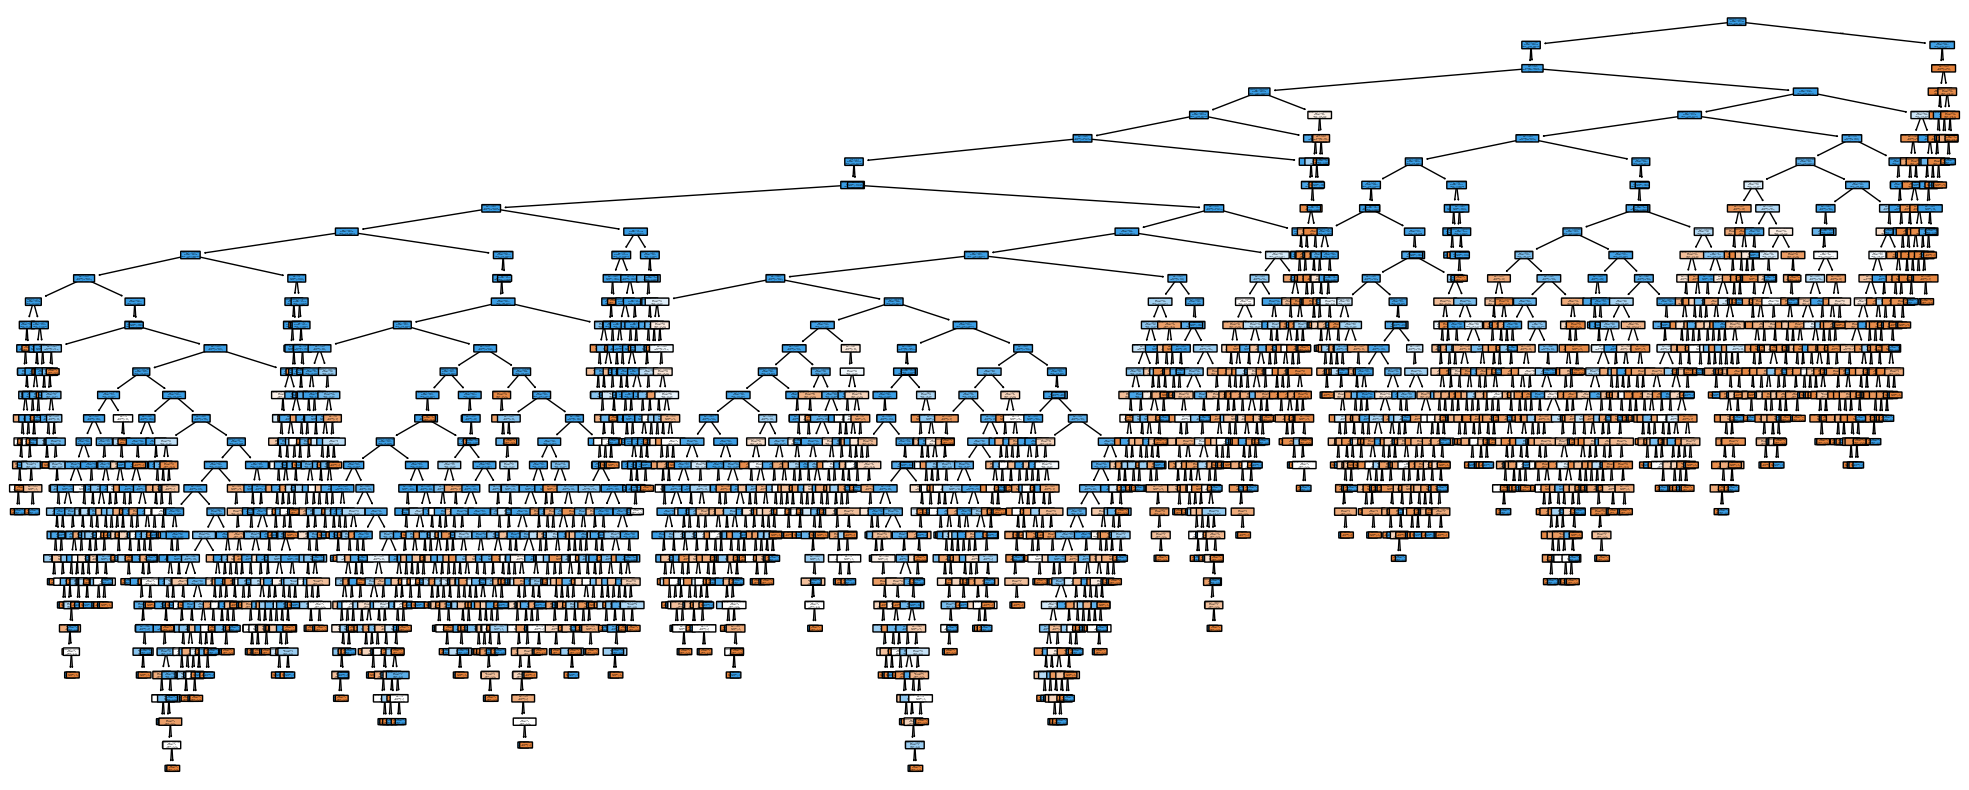

In [21]:
# training a the model using decision tree classifier
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.10, random_state = 2025)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

# predicting the output
predictions = model.predict(xtest)
print("Predictions: ", predictions)

# checking the accuracy of the model
from sklearn.metrics import accuracy_score
print("Accuracy of the model: ", accuracy_score(ytest, predictions))

# visualizing the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (25, 10))
plot_tree(model, feature_names = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig'],
        class_names = ['No Fraud', 'Fraud'], filled = True, precision = 4, rounded = True)
plt.show()





Try classifying whether a transaction is a fraud or not by inserting a transaction in to the model

In [28]:
# features = [type, amount, oldbalanceOrg, newbalanceOrig]
features = np.array([[4, 100, 2000, 1900]])
print(model.predict(features))


['No Fraud']
